# Tutorial for resonance fitting using `pleiades`
Tsviki Y. Hirsh and Alex Long

July 9th 2024

We will be fitting some single transmission measurements on a natural Eu sample. "

##### import the needed libraries: pandas and pleiades

In [1]:
import pandas
from pleiades import sammyUtils, sammyPlotter

### Loading a config file for SAMMY fitting

We have a makeCompoundFit_Eu.ini file that contains many of the parameters that we 

In [2]:
# Load the configuration file from the ini file in the parent directory
natEu = sammyUtils.SammyFitConfig('makeCompoundFit_Eu.ini')

#### What happend:
Pleiades has now created a couple of directories base on the keys and vlaues under ['directories'] in makeCompoundFit_Eu.in

Given that sammy needs to use ascii files to run, and also generates additional files that need to be parsed. We have to create a directory that contains all the needed subfolders to configure, execute, and interpret sammy runs. This is done by creating a archive_dir, which can be set in the makeCompoundFit_Eu.ini config file. If none is given then it defualts to ".archive"

Currently nothing is stored in these directories, but we will start filling them with sammy files. i

In [3]:
!ls -lah .archive/

total 16K
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 09:50 .
drwxr-xr-x 5 l280162 l280162 4.0K Jul  9 09:51 ..
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 09:50 endf
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 09:51 natEu


#### Now Create the needed parFiles from ENDF for the Eu isotopes

Here we are using the create_parFile_from_endf() funtion with the natEu SammyFitConfig object to create the needed parFiles for each of the Eu isotopes list in the makeCompoundFit_Eu.ini file. 

Note: You can change the print verbose level to print out important variables and paths. 

In [4]:
# Create the needed parFiles from ENDF for the isotopes in the configuration file
sammyUtils.create_parFile_from_endf(natEu,verbose_level=00)

#### What happend: 

Pleiades configured two SAMMY runs to generate the needed resonance parameters for the final SAMMY fit. These ENDF SAMMY runs are stored in the 'endf_dir' which is set in makeCompoundFit_Eu.ini

If you `ls` the .archive/endf directory, you will see two sub-dirs: Eu151 & Eu153. Each of these folders contains the results for running SAMMY to generate SAMNDF.PAR files for each respective isotope.

In [5]:
!ls -lah .archive/endf

total 16K
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 09:50 .
drwxr-xr-x 4 l280162 l280162 4.0K Jul  9 09:50 ..
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 09:52 Eu151
drwxr-xr-x 3 l280162 l280162 4.0K Jul  9 09:52 Eu153


#### Configure SAMMY for the fit of Natural Eu

Now that we have the needed SAMNDF.PAR files for each isotope (stored in the .archive/endf/Eu15* folders) we can configure all the needed SAMMY files to fit a naterual Eu transmission spectrum. 

The data for this is stored in `examples/data` and the path is set in makeCompoundFit_Eu.ini as `data_dir = "../data"`

In [6]:
# Configure the sammy run, this will create a compound parFile. 
sammyUtils.configure_sammy_run(natEu,verbose_level=1)

Creating SAMMY parFile files for isotopes: ['Eu-151', 'Eu-153'] with abundances: [0.7, 0.99]
Writing output parFile: /home/l280162/Programs/pleiades/Pleiades-lanl/examples/Notebooks/.archive/natEu/params.par
Creating SAMMY inpFile files for isotopes: ['Eu-151', 'Eu-153'] with abundances: [0.7, 0.99]
No config file given. Using default parameters.
Created compound input file: /home/l280162/Programs/pleiades/Pleiades-lanl/examples/Notebooks/.archive/natEu/input.inp


#### What happend: 

Here Pleiades has taken all the needed information from the two (Eu151, Eu153) `SAMNDF.PAR` files and combined them to form a `params.par` file. Additionally Pleiades has created the needed input.inp file to run the natEu SAMMY fit.  

In [7]:
# Run the sammy fit.
sammyUtils.run_sammy(natEu,verbose_level=1)

Running SAMMY for /home/l280162/Programs/pleiades/Pleiades-lanl/examples/Notebooks/.archive/natEu
Output file: /home/l280162/Programs/pleiades/Pleiades-lanl/examples/Notebooks/.archive/natEu/output.out
Running SAMMY for natEu...


/home/l280162/Programs/pleiades/Pleiades-lanl/pleiades/sammyPlotter.py:31: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, header=None, comment='#', delim_whitespace=True)


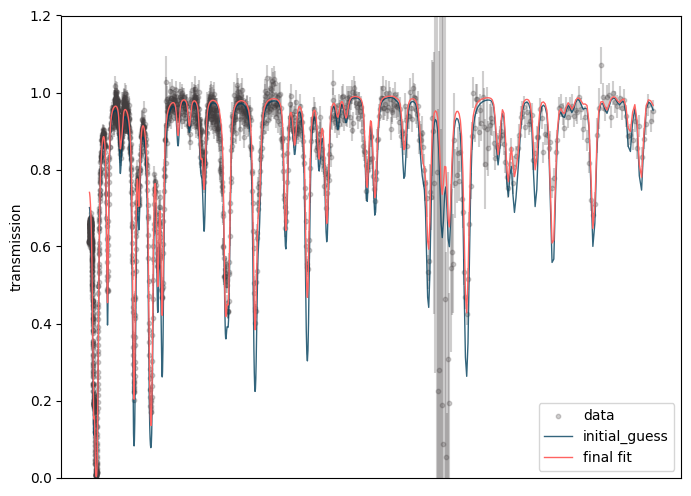

In [8]:
# Plot the results
sammyPlotter.process_and_plot_lst_file(natEu.params['directories']['sammy_fit_dir']+"/results/SAMMY.LST", quantity='transmission')